In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (에러 시 생략 가능)
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False

In [34]:
satisfaction_palette = ['#FFF2E0', '#C0C9EE', '#A2AADB', '#898AC4', '#5C5CA0']


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 지정
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("../00.data/telco.csv")

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# 시각화 스타일
sns.set(style="whitegrid")

def plot_churn_by_service(var):
    ct = pd.crosstab(df[var], df['Churn Label'], normalize='index') * 100
    ct = ct[['Yes', 'No']]
    ct.columns = ['Not Churn', 'Churn']

    # 색상 지정
    colors = ['#5C5CA0', '#FFF2E0']

    # 시각화
    ax = ct.plot(kind='bar', stacked=True, figsize=(5, 5), color=colors)
    plt.title(f"{var} vs Churn Rate", fontsize=14)
    plt.ylabel("Percentage")
    plt.xlabel(var)
    plt.ylim(0, 100)

    # 범례 위치 조정 (오른쪽 위)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

    # 바 위에 텍스트 표시
    for i, (idx, row) in enumerate(ct.iterrows()):
        ax.text(i, row['Not Churn'] + row['Churn']/2, f"{row['Churn']:.1f}%", color="black", ha='center', fontsize=10)
        ax.text(i, row['Not Churn']/2, f"{row['Not Churn']:.1f}%", color="white", ha='center', fontsize=10)

    # Cramér's V 출력
    cramers = cramers_v(df[var], df['Churn Label'])
    print(f"Cramér's V between {var} and Churn Label: {cramers:.3f}")
    plt.tight_layout()
    plt.show()


Cramér's V between Phone Service and Churn Label: 0.000


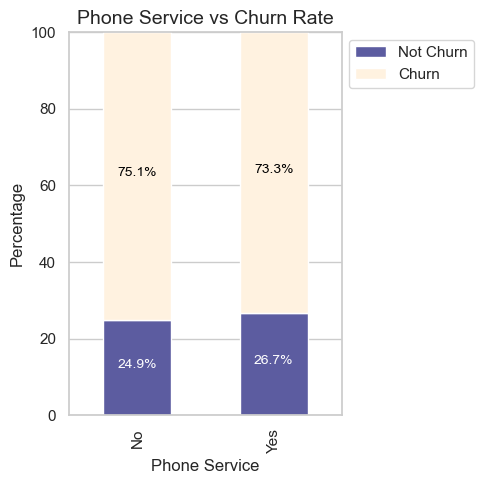

Cramér's V between Multiple Lines and Churn Label: 0.038


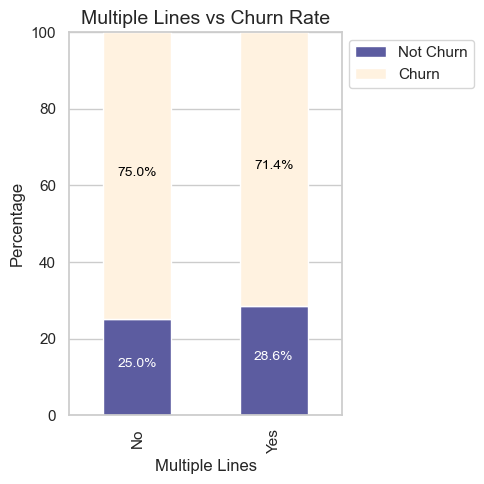

Cramér's V between Internet Service and Churn Label: 0.227


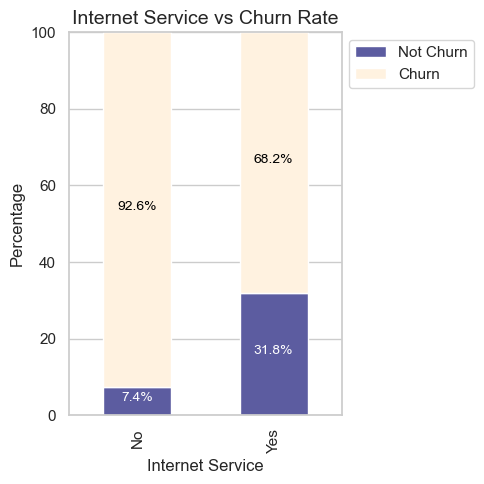

In [93]:
plot_churn_by_service('Phone Service')
plot_churn_by_service('Multiple Lines')
plot_churn_by_service('Internet Service')


C:\Users\somee\AppData\Local\Temp\ipykernel_12200\3555918381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=df, palette=['#5C5CA0', '#FFF2E0'])


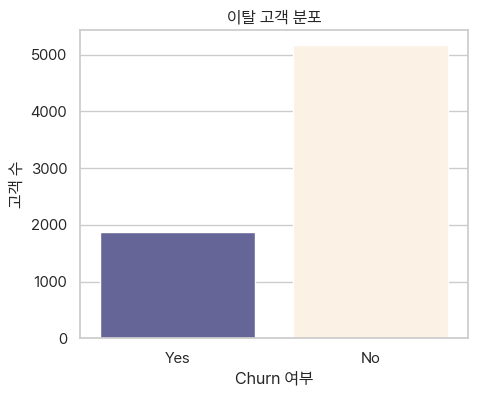

In [76]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn Label', data=df, palette=['#5C5CA0', '#FFF2E0'])
plt.title("이탈 고객 분포")
plt.xlabel("Churn 여부")
plt.ylabel("고객 수")
plt.show()

In [32]:
print(df['Contract'].unique())


['Month-to-Month' 'One Year' 'Two Year']


In [35]:
pastel_palette = {
    'Month-to-Month': '#FFF2E0',
    'One Year': '#C0C9EE',    # ✅ 대문자 Y
    'Two Year': '#898AC4'     # ✅ 대문자 Y
}

C:\Users\somee\AppData\Local\Temp\ipykernel_12200\3634793514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Churn Label', data=df, palette=pastel_palette)


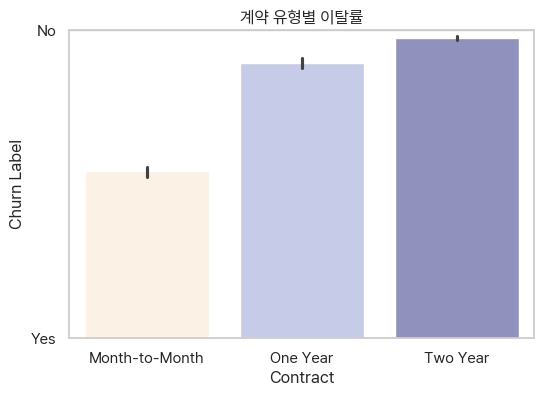

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='Churn Label', data=df, palette=pastel_palette)
plt.title("계약 유형별 이탈률")
plt.ylim(0, 1)
plt.show()

C:\Users\somee\AppData\Local\Temp\ipykernel_12200\1568404038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Satisfaction Score', y='Churn Label', data=df, palette=satisfaction_palette)
C:\Users\somee\AppData\Local\Temp\ipykernel_12200\1568404038.py:2: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x='Satisfaction Score', y='Churn Label', data=df, palette=satisfaction_palette)


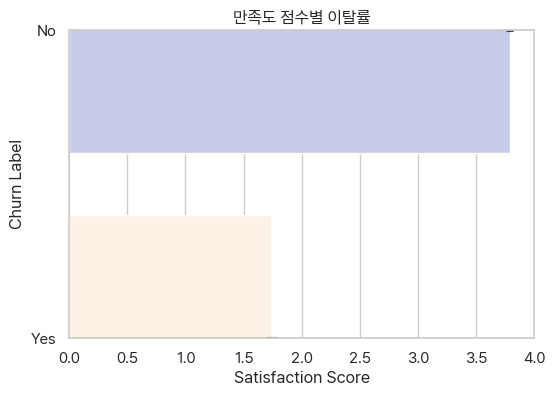

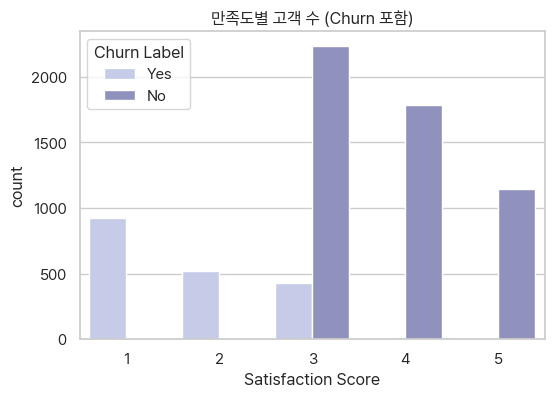

In [40]:
plt.figure(figsize=(6,4))
sns.barplot(x='Satisfaction Score', y='Churn Label', data=df, palette=satisfaction_palette)
plt.title("만족도 점수별 이탈률")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Satisfaction Score', hue='Churn Label', data=df, palette=['#C0C9EE', '#898AC4'])
plt.title("만족도별 고객 수 (Churn 포함)")
plt.show()


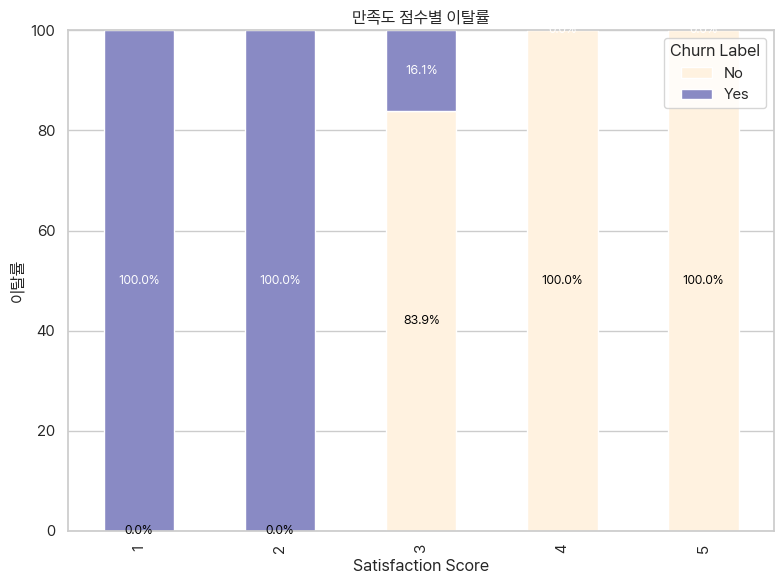

In [113]:
# 1. 교차표 생성
ct = pd.crosstab(df['Satisfaction Score'], df['Churn Label'])

# 2. 컬럼 순서 강제 지정 (항상 Yes가 위에 오게)
ct = ct[['No', 'Yes']]

# 3. 비율 변환
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# 4. 색상 정의
colors = ['#FFF2E0', '#898AC4']  # No (아래), Yes (위)

# 5. 시각화
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)
plt.title("만족도 점수별 이탈률")
plt.ylabel("이탈률")
plt.xlabel("Satisfaction Score")
plt.legend(title="Churn Label", loc='upper right')
plt.ylim(0, 100)

# 6. 텍스트 위치 조정
for i, (idx, row) in enumerate(ct_percent.iterrows()):
    plt.text(i, row['No']/2, f"{row['No']:.1f}%", ha='center', va='center', color='black', fontsize=9)
    plt.text(i, row['No'] + row['Yes']/2, f"{row['Yes']:.1f}%", ha='center', va='center', color='white', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\somee\AppData\Local\Temp\ipykernel_12200\3730559233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Monthly Charge', data=df, palette=['#C0C9EE', '#898AC4'])


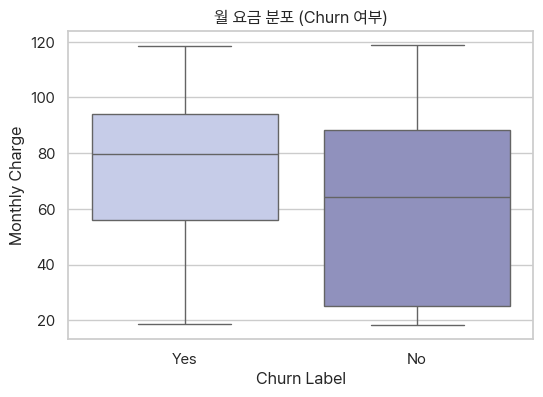

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df, palette=['#C0C9EE', '#898AC4'])
plt.title("월 요금 분포 (Churn 여부)")
plt.show()

C:\Users\somee\AppData\Local\Temp\ipykernel_12200\340903885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Tenure in Months', data=df, palette=['#C0C9EE', '#898AC4'])


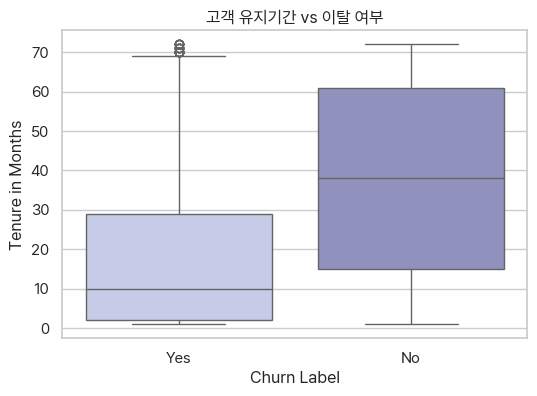

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn Label', y='Tenure in Months', data=df, palette=['#C0C9EE', '#898AC4'])
plt.title("고객 유지기간 vs 이탈 여부")
plt.show()

In [58]:
def churn_heatmap(df, row_var, col_var, cmap='YlOrRd'):
    from matplotlib.colors import LinearSegmentedColormap
    
    if cmap == 'pastel':
        cmap = LinearSegmentedColormap.from_list(
            "pastelmap", ["#FFF2E0", "#C0C9EE", "#898AC4"]
        )

    temp_df = df.copy()
    temp_df['Churn'] = temp_df['Churn Label'].map({'Yes': 1, 'No': 0})
    pivot_table = temp_df.pivot_table(index=row_var, columns=col_var, values='Churn', aggfunc='mean')
    
    plt.figure(figsize=(8,5))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=cmap)
    plt.title(f"{row_var} × {col_var} 조합별 이탈률")
    plt.ylabel(row_var)
    plt.xlabel(col_var)
    plt.show()


In [56]:
from matplotlib.colors import LinearSegmentedColormap

# 색상 리스트: 밝은 살구 → 연보라 → 진한 보라
custom_cmap = LinearSegmentedColormap.from_list(
    "pastelmap",
    ["#FFF2E0", "#C0C9EE", "#898AC4"]
)


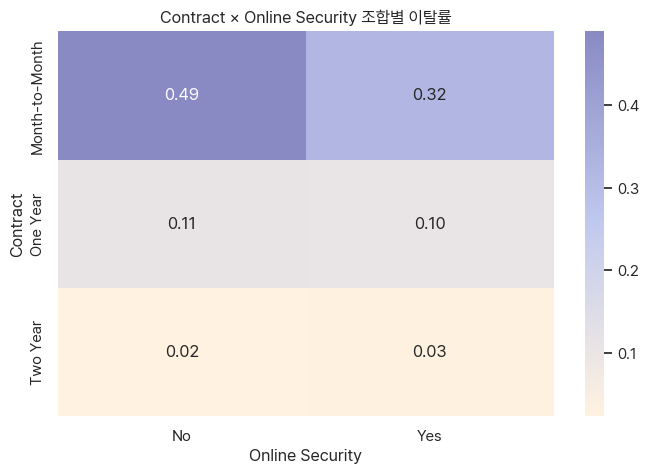

In [57]:
temp_df = df.copy()
temp_df['Churn'] = temp_df['Churn Label'].map({'Yes': 1, 'No': 0})
pivot_table = temp_df.pivot_table(index='Contract', columns='Online Security', values='Churn', aggfunc='mean')

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=custom_cmap)
plt.title("Contract × Online Security 조합별 이탈률")
plt.show()


Cramér's V between Online Security and Churn Label: 0.170


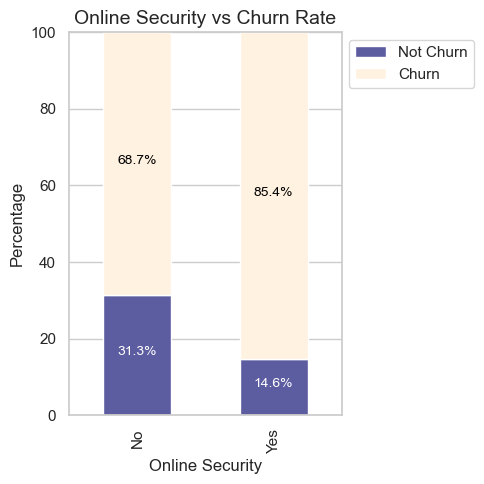

Cramér's V between Streaming TV and Churn Label: 0.062


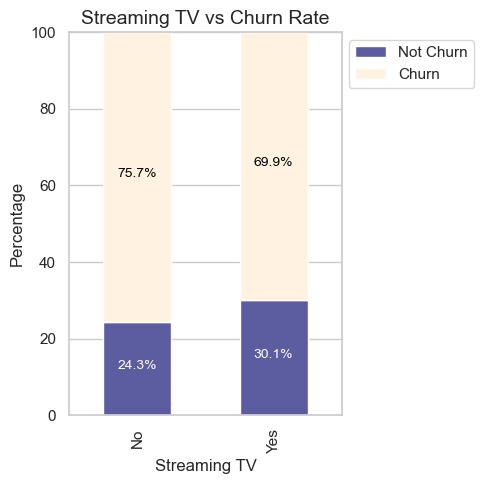

Cramér's V between Internet Service and Churn Label: 0.227


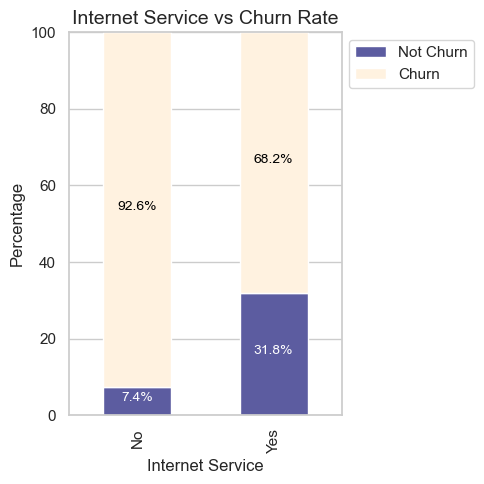

Cramér's V between Dependents and Churn Label: 0.248


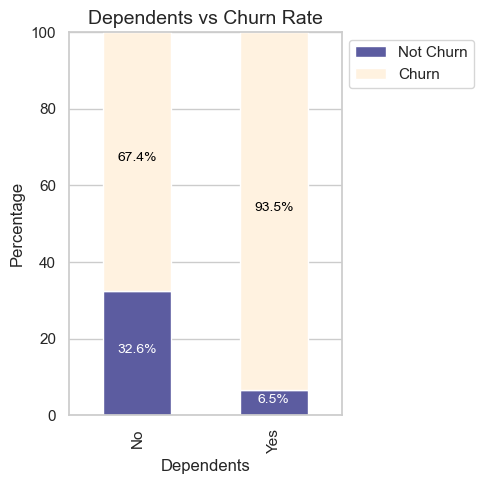

Cramér's V between Paperless Billing and Churn Label: 0.191


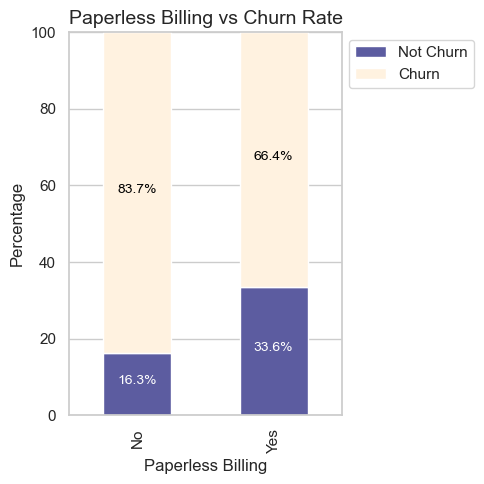

Cramér's V between Contract and Churn Label: 0.453


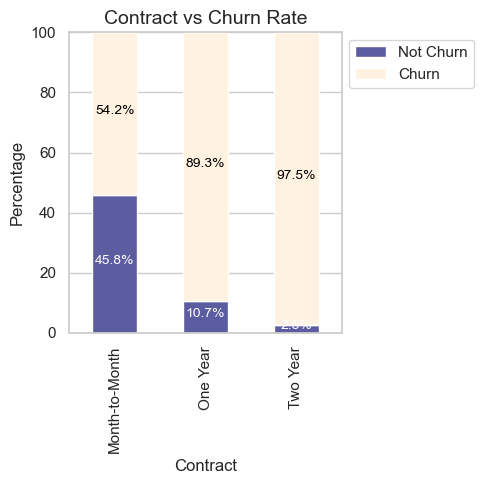

In [94]:
plot_churn_by_service('Online Security')
plot_churn_by_service('Streaming TV')
plot_churn_by_service('Internet Service')
plot_churn_by_service('Dependents')
plot_churn_by_service('Paperless Billing')
plot_churn_by_service('Contract')  # 다항범주형이지만 가능
